In [112]:
import numpy as np
import pandas as pd

data = pd.read_csv('../data/sales.csv')
print(data.shape)
data.head()

(328, 3)


,YMD,AMT,CNT
0,20190514,0,1
1,20190519,18000,1
2,20190521,50000,4
3,20190522,125000,7
4,20190523,222500,13


In [113]:
wt = pd.read_csv('../data/weather.csv')
print(wt.shape)
wt.head()

(702, 9)


,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,108,2018-06-01,23.8,17.5,30.2,0.0,4.3,1.9,0.0
1,108,2018-06-02,23.4,17.6,30.1,0.0,4.5,2.0,0.0
2,108,2018-06-03,24.0,16.9,30.8,0.0,4.2,1.6,0.0
3,108,2018-06-04,22.6,18.9,27.5,0.0,4.4,1.9,0.0
4,108,2018-06-05,23.7,17.7,29.2,0.0,4.0,1.7,0.0


In [114]:
wt['tm']=wt['tm'].apply(lambda x: int(x.replace('-','')))

In [115]:
data.describe()

,YMD,AMT,CNT
count,3.280000e+02,3.280000e+02,328.000000
mean,2.019406e+07,7.600000e+05,40.823171
std,4.447262e+03,2.980138e+05,18.908580
min,2.019051e+07,0.000000e+00,1.000000
25%,2.019081e+07,5.367500e+05,27.000000
50%,2.019111e+07,7.700000e+05,38.000000
75%,2.020020e+07,9.855000e+05,55.000000
max,2.020043e+07,1.429000e+06,97.000000


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   YMD     328 non-null    int64
 1   AMT     328 non-null    int64
 2   CNT     328 non-null    int64
dtypes: int64(3)
memory usage: 7.8 KB


In [117]:
wt.describe()

,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
count,702.0,7.020000e+02,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,108.0,2.018938e+07,13.409544,9.212536,18.377635,2.681339,4.253419,1.935897,0.049288
std,0.0,6.604117e+03,10.429220,10.577157,10.561196,9.628046,1.187564,0.688789,0.471642
min,108.0,2.018060e+07,-10.500000,-14.400000,-6.600000,0.000000,1.600000,0.600000,0.000000
25%,108.0,2.018112e+07,4.625000,0.300000,9.425000,0.000000,3.400000,1.500000,0.000000
50%,108.0,2.019052e+07,12.600000,7.950000,18.650000,0.000000,4.200000,1.800000,0.000000
75%,108.0,2.019111e+07,22.900000,18.900000,27.575000,0.100000,4.900000,2.300000,0.000000
max,108.0,2.020050e+07,33.700000,30.300000,39.600000,96.500000,11.800000,6.000000,8.800000


In [118]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stnId   702 non-null    int64  
 1   tm      702 non-null    int64  
 2   avgTa   702 non-null    float64
 3   minTa   702 non-null    float64
 4   maxTa   702 non-null    float64
 5   sumRn   702 non-null    float64
 6   maxWs   702 non-null    float64
 7   avgWs   702 non-null    float64
 8   ddMes   702 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 49.5 KB


In [119]:
DF = data.merge(wt, how='left', left_on='YMD', right_on='tm')
print(DF.shape)
DF.head()

(328, 12)


,YMD,AMT,CNT,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,20190514,0,1,108,20190514,19.6,12.9,26.9,0.0,4.1,1.6,0.0
1,20190519,18000,1,108,20190519,19.4,17.9,21.6,22.0,2.7,1.2,0.0
2,20190521,50000,4,108,20190521,17.2,11.7,23.8,0.0,5.9,2.9,0.0
3,20190522,125000,7,108,20190522,19.5,12.3,26.5,0.0,5.4,2.4,0.0
4,20190523,222500,13,108,20190523,22.1,15.0,29.2,0.0,3.5,1.7,0.0


In [120]:
data = DF.iloc[:,[0,2,7,8]]
data.head()

,YMD,CNT,maxTa,sumRn
0,20190514,1,26.9,0.0
1,20190519,1,21.6,22.0
2,20190521,4,23.8,0.0
3,20190522,7,26.5,0.0
4,20190523,13,29.2,0.0


In [121]:
data['rn_yn'] =(data['sumRn'] > 0).astype('int8')

In [122]:
data

,YMD,CNT,maxTa,sumRn,rn_yn
0,20190514,1,26.9,0.0,0
1,20190519,1,21.6,22.0,1
2,20190521,4,23.8,0.0,0
3,20190522,7,26.5,0.0,0
4,20190523,13,29.2,0.0,0
...,...,...,...,...,...
323,20200424,51,14.3,0.0,0
324,20200425,34,17.1,0.0,0
325,20200426,55,19.0,0.0,0
326,20200427,45,18.3,0.0,0


- 비가 올때 매출건수와 안올때 매출건수를 비교

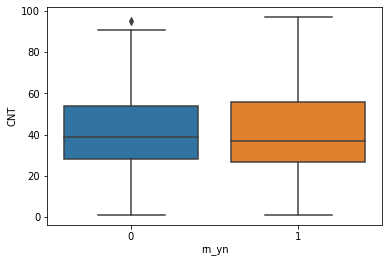

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.boxplot(x='rn_yn', y='CNT', data=data)
plt.show()

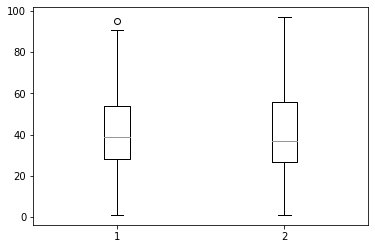

In [124]:
# or

sp =np.array(data.iloc[:,[1,4]])

tg1 = sp[sp[:,1] == 0, 0]
tg2 = sp[sp[:,1] == 1, 0]

plt_sp = [tg1, tg2]
plt.boxplot(plt_sp)
plt.show()

- 눈에 띄는 차이를 판단하기 어려움
### 정규성 검정

In [125]:
data.groupby('rn_yn').count()

,YMD,CNT,maxTa,sumRn
rn_yn,,,,
0,236,236,236,236
1,92,92,92,92


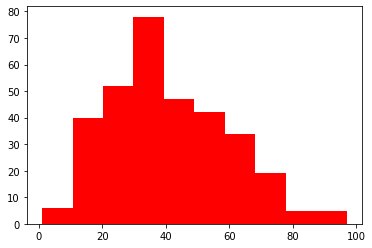

In [126]:
plt.hist(data['CNT'], color='r')
# plt.hist(tg2, color='b')
plt.show()

- shapiro-wilk 검정 수행

In [149]:
stats.shapiro(data['CNT'].values)

ShapiroResult(statistic=0.9774416089057922, pvalue=5.0628455937840044e-05)

- 결과를 다소 이해하기 힘듬 
--------------------------
- kolmogorov-smirnov 검정 수행
    - 정규분포에 국한되지 않고 두 표본이 같은 분포를 따르는지 확인할 수 있는 방법

In [152]:
stats.ks_2samp(tg1, tg2)

KstestResult(statistic=0.07350773765659543, pvalue=0.8352082504725988)

- 유의수준 0.05이하라면 두 분포는 서로 다른분포라고 할 수 있음

- q-q plot으로 정규성 검정

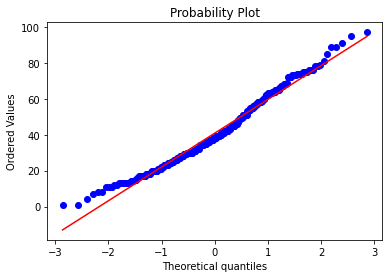

In [139]:
stats.probplot(data['CNT'], plot=plt)
# stats.probplot(tg1, plot=plt)
# stats.probplot(tg2, plot=plt)
plt.show()

- 데이터 개수가 충분(n>25)이므로 중심극한정리에 따라 정규성 만족
### 등분산성 검정

In [77]:
import scipy.stats as stats

print(stats.levene(tg1, tg2)) # 레빈 검정
print(stats.fligner(tg1, tg2)) # 플리그너 검정
print(stats.bartlett(tg1,tg2)) # 바틀렛 검정

LeveneResult(statistic=1.29079232078433, pvalue=0.2567364920691994)
FlignerResult(statistic=1.5465770819238722, pvalue=0.21364146849597607)
BartlettResult(statistic=1.770645398594986, pvalue=0.1833022260487283)


- 등분산성 조건 충족(p-value > 0.05)

### t-test 수행

In [153]:
stats.ttest_ind(tg1, tg2, equal_var=True)

Ttest_indResult(statistic=-0.19646113794791722, pvalue=0.8443716618894902)

- 유의확률이 유의수준 이상이기 때문에 귀무가설을 기각하지 못함 => 강수여부에 따른 매출건수의 평균의 차이는 통계적으로 없음